## Data Dictionary:

Loan_ID:  Unique Loan ID
Gender:   Male/ Female
Married:  Applicant married (Y/N)
Dependents: Number of dependents
Education:  Applicant Education (Graduate/Not Graduate)
Self_Employed: Self employed (Y/N)
ApplicantIncome: Applicant income
CoapplicantIncome: Coapplicant income
LoanAmount: Loan amount in thousands
Loan_Amount_Term: Term of loan in months
Credit_History: credit history meets guidelines (Binary 0/1)
Property_Area: Urban/ Semi Urban/ Rural
Loan_Status: (Target) Loan approved (Y/N)


## Can normalize values, re-engineer variables, remove nulls instead of filling/vice versa, change sampling methods, variable selection, etc etc, but changing methods of data pre-processing is important.

If assymetric in terms of cost, use expected value instead of accuracy.

## 1. Import Libraries:

In [80]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt
%matplotlib inline

2. Import Data:

In [81]:
train_original = pd.read_csv(r"C:\Users\Ethan\Downloads\loan_sanction_train.csv")
train = train_original.copy()
train.head()

test_original = pd.read_csv(r"C:\Users\Ethan\Downloads\loan_sanction_test.csv")
test = test_original.copy()

## Explore Data

In [82]:
train.shape


(614, 13)

In [83]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [84]:
distinct_values = train['Credit_History'].unique()
print(distinct_values)

[ 1.  0. nan]


## Data Exploration - Univariate Exploration

In [85]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status', ylabel='Count'>

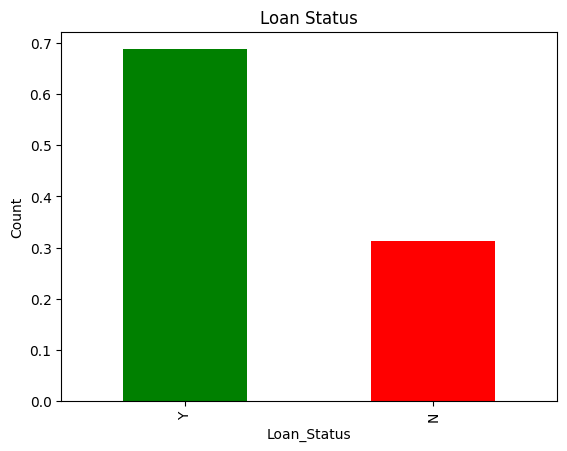

In [86]:
#Various barplots coming up: Loan status bar plot
plt.title('Loan Status')
plt.xlabel('Loan Status:Yes/No')
plt.ylabel('Count')

print(train['Loan_Status'].value_counts(normalize = True))
train['Loan_Status'].value_counts(normalize = True).plot.bar(color=['green', 'red'])

<Axes: title={'center': 'Married'}, xlabel='Married'>

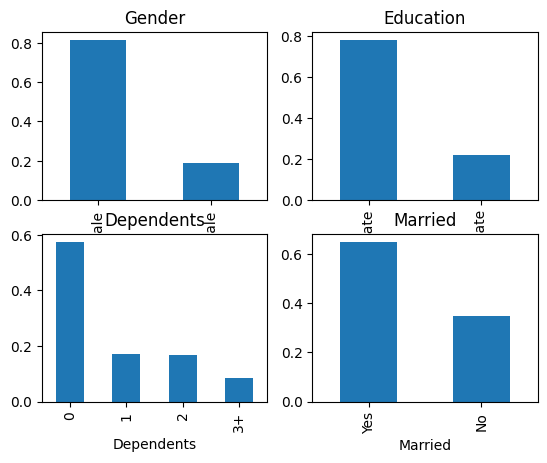

In [87]:
#Gender barplot
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
train['Education'].value_counts(normalize = True).plot.bar(title ='Education')
plt.subplot(223)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(224)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')


## Data Exploration - Continuous Variables (Numerical)
#### histograms & boxplots to understand data & outliers

<Axes: title={'center': 'Property Area'}, xlabel='Property_Area'>

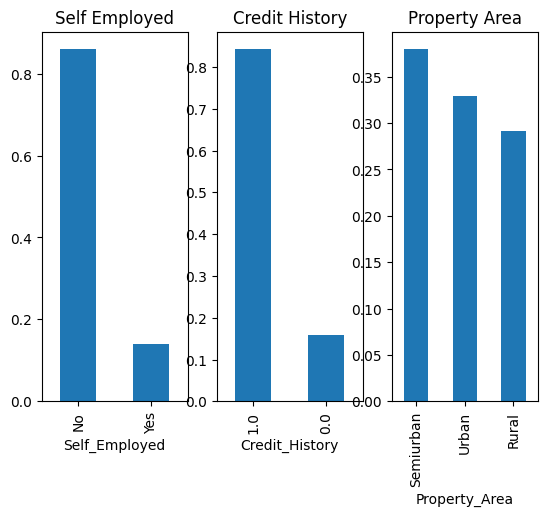

In [88]:
#More bar plots
plt.subplot(131)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(132)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property Area')

c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

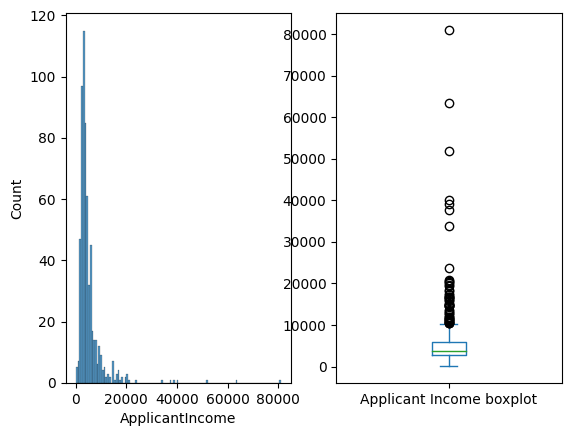

In [89]:
plt.subplot(121)
sns.histplot(train['ApplicantIncome'],label="Applicant Income distribution")
plt.subplot(122)
train['ApplicantIncome'].plot(kind='box',label="Applicant Income boxplot")

### There are a lot of outliers according to the income boxplot. Most people seem to have an income between 0 and 20,000. Let's try & see if there are any other variables that affect income:

Mean ApplicantIncome for Education == Graduate: 5857.433333333333
Mean ApplicantIncome for Education == Not Graduate: 3777.283582089552


c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

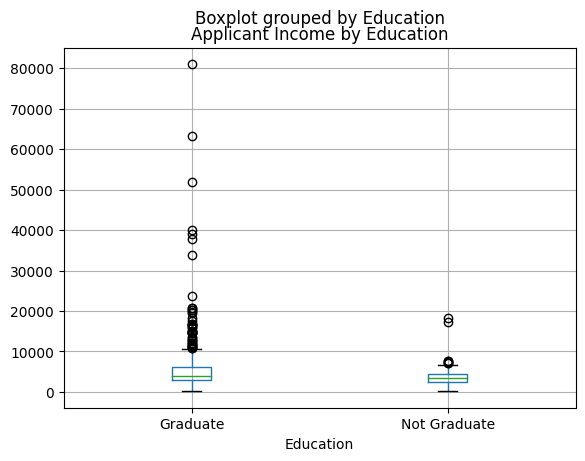

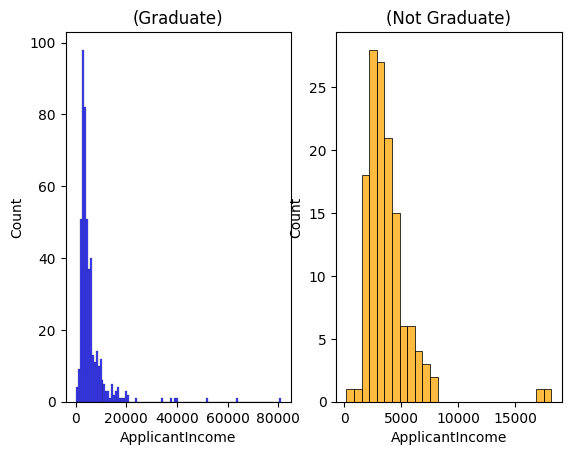

In [90]:
#Education boxplots & histograms
train.boxplot(column='ApplicantIncome',by='Education')
plt.title('Applicant Income by Education')
plt.figure()
plt.subplot(121)
sns.histplot(train[train['Education'] == 'Graduate']['ApplicantIncome'], color='blue')
plt.title('(Graduate)')
plt.subplot(122)
sns.histplot(train[train['Education'] == 'Not Graduate']['ApplicantIncome'],color='orange')
plt.title('(Not Graduate)')

mean_income_graduate = train.loc[train['Education'] == 'Graduate', 'ApplicantIncome'].mean()
print(f'Mean ApplicantIncome for Education == Graduate: {mean_income_graduate}')
mean_income_not_graduate = train.loc[train['Education'] == 'Not Graduate', 'ApplicantIncome'].mean()
print(f'Mean ApplicantIncome for Education == Not Graduate: {mean_income_not_graduate}')


c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

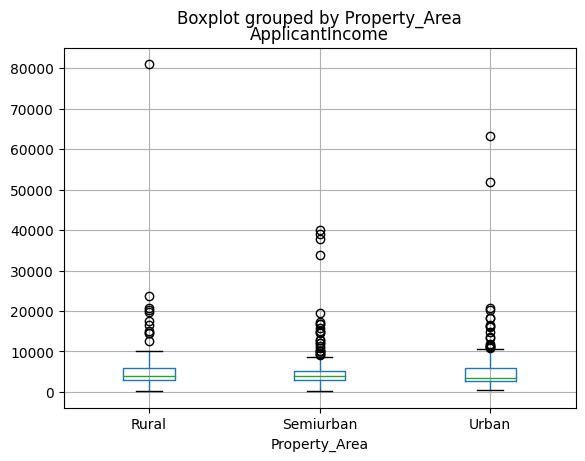

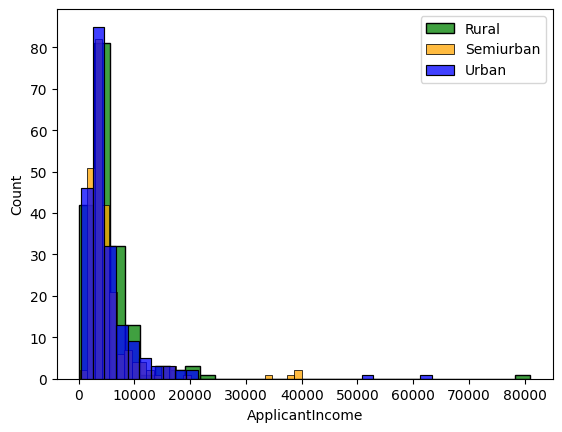

In [91]:
#Property Area boxplots & histograms
train.boxplot(column='ApplicantIncome',by='Property_Area')
plt.figure()
#plt.subplot(131)
sns.histplot(train[train['Property_Area'] == 'Rural']['ApplicantIncome'], bins=30, kde=False, color='green', label='Rural')
#plt.subplot(132)
sns.histplot(train[train['Property_Area'] == 'Semiurban']['ApplicantIncome'], bins=30, kde=False, color='orange', label='Semiurban')
#plt.subplot(133)
sns.histplot(train[train['Property_Area'] == 'Urban']['ApplicantIncome'], bins=30, kde=False, color='blue', label='Urban')
plt.legend()


Mean ApplicantIncome for Credit_History = 1: 5426.526315789473
Mean ApplicantIncome for Credit_History = 0: 5679.438202247191


c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

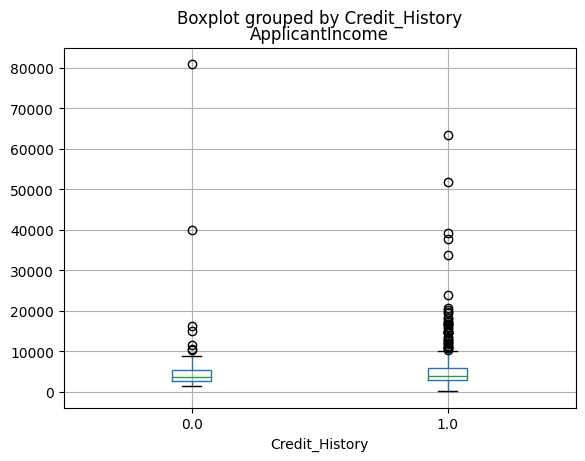

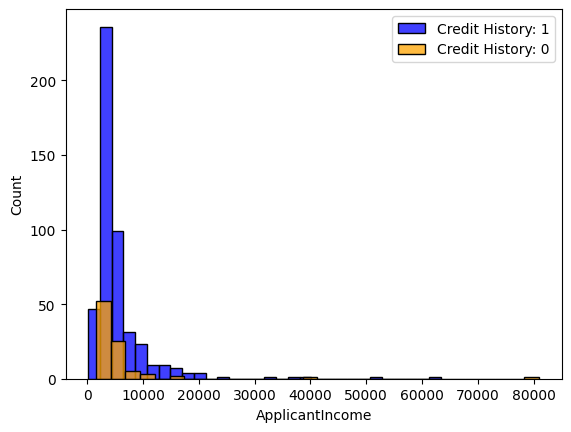

In [92]:
train.boxplot(column='ApplicantIncome',by='Credit_History')
plt.figure()
sns.histplot(train[train['Credit_History'] == 1]['ApplicantIncome'], bins=30, kde=False, color='blue', label='Credit History: 1')
sns.histplot(train[train['Credit_History'] == 0]['ApplicantIncome'], bins=30, kde=False, color='orange', label='Credit History: 0')
plt.legend()

mean_income_Credit_1 = train.loc[train['Credit_History'] == 1, 'ApplicantIncome'].mean()
print(f'Mean ApplicantIncome for Credit_History = 1: {mean_income_Credit_1}')
mean_income_Credit_0 = train.loc[train['Credit_History'] == 0, 'ApplicantIncome'].mean()
print(f'Mean ApplicantIncome for Credit_History = 0: {mean_income_Credit_0}')

## Let's see which variables have relationships with Loan_Status:

In [93]:
#Encoding Loan_Status as numerical data so we can make a correlation heatmap
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)


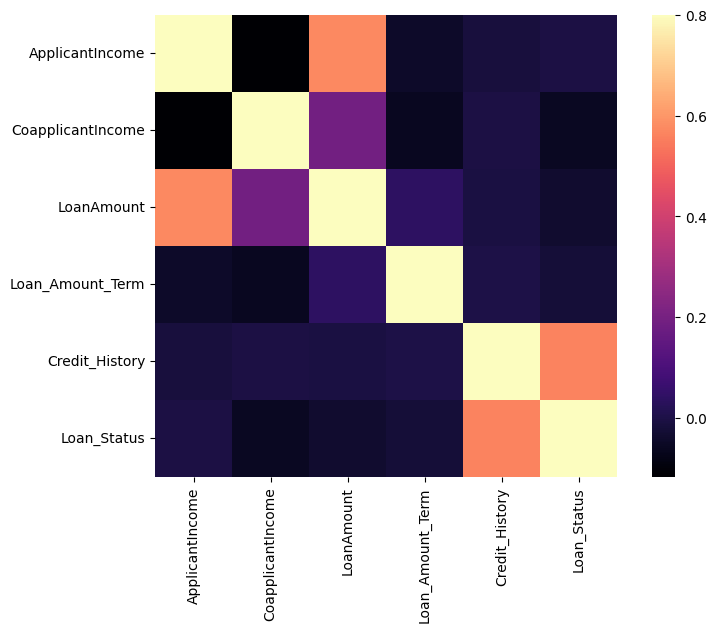

In [94]:
matrix = train.corr(numeric_only = True) 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="magma");

## Data Preprocessing - Dealing with Nulls

In [95]:
nulls = train.isnull().sum()
print(nulls)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [96]:
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


#### How do we want to deal with null values? 2 Options:
#### Option 1: replace nulls with mean/median for numerical data and mode for categorical data. Let's use median instead of mean, as the boxplots suggest lots of outliers.
#### Option 2: Remove rows with null entries.
#### Let's start with Option 1 for now.

In [97]:
#What should we replace NaN from Loan_Amount_Term with?
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [98]:
train['Loan_Amount_Term'].median()

360.0

In [99]:
train['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [100]:
train['LoanAmount'].median()

128.0

In [101]:
train['LoanAmount'].mean()

146.41216216216216

In [102]:
train['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [103]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


In [104]:
nulls = train.isnull().sum()
print(nulls)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [105]:
testnulls = test.isnull().sum()
print(testnulls)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [106]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [107]:
testnulls = test.isnull().sum()
print(testnulls)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Let's turn all categorical variables into numerical variables so that we can run ADABoost

In [108]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [109]:
train['Property_Area'].values

array(['Urban', 'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban',
       'Semiurban', 'Urban', 'Semiurban', 'Urban', 'Urban', 'Urban',
       'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Rural', 'Urban',
       'Urban', 'Urban', 'Semiurban', 'Rural', 'Semiurban', 'Semiurban',
       'Semiurban', 'Urban', 'Urban', 'Semiurban', 'Urban', 'Urban',
       'Rural', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Semiurban', 'Urban', 'Urban',
       'Semiurban', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Urban',
       'Urban', 'Rural', 'Rural', 'Semiurban', 'Semiurban', 'Urban',
       'Urban', 'Urban', 'Semiurban', 'Urban', 'Semiurban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Semiurban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', '

In [110]:
#Drop Loan_ID:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

#Encode Gender M/F into 1/0:
train['Gender'].replace('Male',1,inplace=True)
train['Gender'].replace('Female',0,inplace=True)
test['Gender'].replace('Male',1,inplace=True)
test['Gender'].replace('Female',0,inplace=True)

#Encode Married Y/N into 1/0:
train['Married'].replace('Yes',1,inplace=True)
train['Married'].replace('No',0,inplace=True)
test['Married'].replace('Yes',1,inplace=True)
test['Married'].replace('No',0,inplace=True)

#Encode Dependents into numerical data:
train['Dependents'].replace('0',0,inplace=True)
test['Dependents'].replace('0',0,inplace=True)
train['Dependents'].replace('1',1,inplace=True)
test['Dependents'].replace('1',1,inplace=True)
train['Dependents'].replace('2',2,inplace=True)
test['Dependents'].replace('2',2,inplace=True)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

#Encode Education Graduate/Not Graduate into 1/0
train['Education'].replace('Graduate',1,inplace = True)
train['Education'].replace('Not Graduate',0,inplace = True)
test['Education'].replace('Graduate',1,inplace = True)
test['Education'].replace('Not Graduate',0,inplace = True)

#Encode Self-Employed Y/N into 1/0:
train['Self_Employed'].replace('Yes',1,inplace = True)
train['Self_Employed'].replace('No',0,inplace = True)
test['Self_Employed'].replace('Yes',1,inplace = True)
test['Self_Employed'].replace('No',0,inplace = True)

#Encode Property_Area values Rural, Semiurban, Urban into 0/1/2:
train['Property_Area'].replace('Rural',0,inplace = True)
train['Property_Area'].replace('Semiurban',1,inplace = True)
train['Property_Area'].replace('Urban',2,inplace = True)
test['Property_Area'].replace('Rural',0,inplace = True)
test['Property_Area'].replace('Semiurban',1,inplace = True)
test['Property_Area'].replace('Urban',2,inplace = True)

## Now that all data is numerical, let's double check the correlation matrix & see if we can drop some variables to increase model accuracy

                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.364569    0.172914  -0.045364      -0.000525   
Married            0.364569  1.000000    0.334216  -0.012304       0.004489   
Dependents         0.172914  0.334216    1.000000  -0.055752       0.056798   
Education         -0.045364 -0.012304   -0.055752   1.000000       0.010383   
Self_Employed     -0.000525  0.004489    0.056798   0.010383       1.000000   
ApplicantIncome    0.058809  0.051708    0.118202   0.140760       0.127180   
CoapplicantIncome  0.082912  0.075948    0.030430   0.062290      -0.016100   
LoanAmount         0.106904  0.146546    0.163103   0.168759       0.115100   
Loan_Amount_Term  -0.074030 -0.100912   -0.103864   0.073928      -0.033739   
Credit_History     0.009170  0.010938   -0.040160   0.073658      -0.001550   
Property_Area     -0.025752  0.004257   -0.000244   0.065243      -0.030860   
Loan_Status        0.017987  0.091478    0.010118   

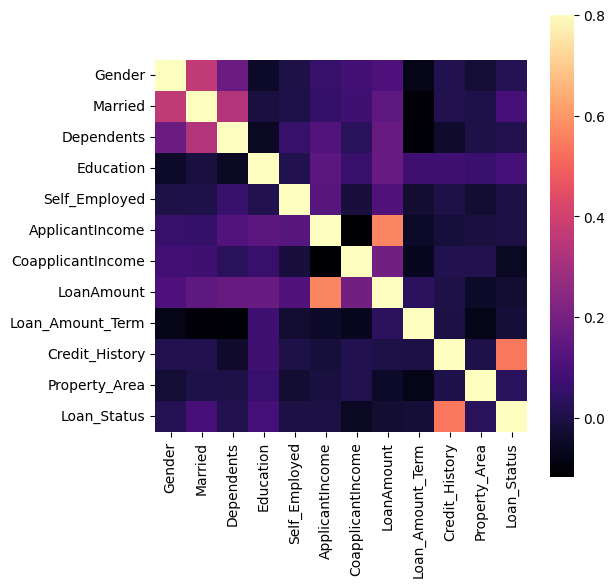

In [111]:
matrix = train.corr(numeric_only = True) 
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="magma");
print(matrix)

In [112]:
#train.drop('Loan_Amount_Term',axis = 1)
#train.drop('LoanAmount',axis=1)
#train.drop('ApplicantIncome', axis = 1)
#train.drop('Dependents',axis = 1)
#train.drop('Married',axis = 1)
#train.drop('Gender', axis=1)

Handling Outliers

In [113]:
train[train['CoapplicantIncome']<10000].shape


(608, 12)

In [114]:
import numpy as np
train = train[train['CoapplicantIncome']<10000]

for col in ['LoanAmount','ApplicantIncome']:
    train[col] = train[col].apply(np.log1p)

In [115]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Building a model: ADABoost

In [116]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


In [117]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [118]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']
#Note: The test csv file actually doesn't have a Loan Status column, so it's worthless as far as making predictions go. Instead, let's split our trianing data.
#X_test = test.drop('Loan_Status', axis = 1)
#y_test = test['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.34)

Accuracy: 0.82
Cross-Validation Scores: [0.81967213 0.81967213 0.75409836 0.7704918  0.78688525 0.78688525
 0.86885246 0.85245902 0.78333333 0.86666667]
Mean Accuracy: 0.8109016393442623

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.46      0.61        63
           1       0.81      0.98      0.88       144

    accuracy                           0.82       207
   macro avg       0.86      0.72      0.75       207
weighted avg       0.84      0.82      0.80       207


Confusion Matrix:
[[ 29  34]
 [  3 141]]


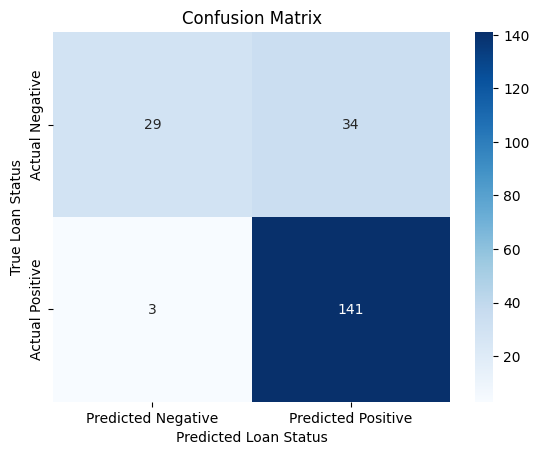

              Feature  Importance
9      Credit_History    0.353333
7          LoanAmount    0.193333
6   CoapplicantIncome    0.133333
1             Married    0.093333
10      Property_Area    0.093333
5     ApplicantIncome    0.080000
8    Loan_Amount_Term    0.053333
0              Gender    0.000000
2          Dependents    0.000000
3           Education    0.000000
4       Self_Employed    0.000000


In [119]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=150,learning_rate = 0.05, random_state=42)
bagging_adaboost_model = BaggingClassifier(base_estimator=adaboost_model, n_estimators=10, random_state=42)
adaboost_model.fit(X_train, y_train)
#bagging_adaboost_model.fit(X_train, y_train)
y_pred = adaboost_model.predict(X_test)
#y_pred = bagging_adaboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cv_scores = cross_val_score(adaboost_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Loan Status')
plt.ylabel('True Loan Status')
plt.show()

feature_importances = adaboost_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

## Now, let's try using XGBoost

In [120]:
from xgboost import XGBClassifier

Accuracy: 0.80


Cross-Validation Scores: [0.81967213 0.81967213 0.7704918  0.7704918  0.78688525 0.78688525
 0.86885246 0.85245902 0.8        0.86666667]
Mean Accuracy: 0.814207650273224

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.38      0.54        63
           1       0.78      0.99      0.87       144

    accuracy                           0.80       207
   macro avg       0.85      0.68      0.71       207
weighted avg       0.83      0.80      0.77       207


Confusion Matrix:
[[ 24  39]
 [  2 142]]
              Feature  Importance
9      Credit_History    0.753279
5     ApplicantIncome    0.077702
1             Married    0.072918
10      Property_Area    0.065407
7          LoanAmount    0.028346
8    Loan_Amount_Term    0.002349
0              Gender    0.000000
2          Dependents    0.000000
3           Education    0.000000
4       Self_Employed    0.000000
6   CoapplicantIncome    0.000000


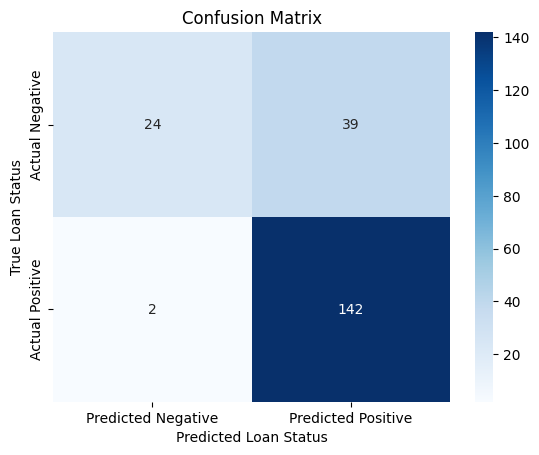

In [121]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.01, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cv_scores = cross_val_score(xgb_model, X, y, cv=10)

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

feature_importances = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Loan Status')
plt.ylabel('True Loan Status')
plt.show()

In [122]:
from sklearn.metrics import roc_curve, auc